In [2]:
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
agua = pd.read_csv("consumo-agua.csv")

alcaldía vs índice_des
consumo_total_dom vs bimestre
consumo_total_no_dom
indice_des vs bimestre

In [5]:
agua.head(1)

,Geo Point,Geo Shape,consumo_total_mixto,anio,nomgeo,consumo_prom_dom,consumo_total_dom,alcaldia,colonia,consumo_prom_mixto,consumo_total,consumo_prom,consumo_prom_no_dom,bimestre,consumo_total_no_dom,gid,indice_des
0,"19.4552601937,-99.1126617526","{""type"": ""MultiPolygon"", ""coordinates"": [[[[-9...",159.72,2019,Gustavo A. Madero,42.566364,468.23,GUSTAVO A. MADERO,7 DE NOVIEMBRE,53.24,631.0,42.066667,3.05,3,3.05,57250,ALTO


In [152]:
dom_no = pd.DataFrame(agua,columns=['alcaldia','consumo_total_dom','consumo_total_no_dom'])\
.groupby(['alcaldia'], as_index=False).sum()\
.sort_values(by=['alcaldia'])
dom_no

,alcaldia,consumo_total_dom,consumo_total_no_dom
0,ALVARO OBREGON,6.590161e+06,2492864.010
1,AZCAPOTZALCO,6.153755e+06,1897004.540
2,BENITO JUAREZ,9.894931e+06,2815269.571
3,COYOACAN,5.128303e+06,2209569.070
4,CUAJIMALPA,2.064264e+06,736118.460
5,CUAUHTEMOC,1.034611e+07,6074370.831
6,GUSTAVO A. MADERO,9.196449e+06,2740658.660
7,IZTACALCO,4.663498e+06,909975.230
8,IZTAPALAPA,5.263020e+06,2213018.590
9,MAGDALENA CONTRERAS,8.449665e+05,361492.280


<AxesSubplot:xlabel='consumo_total_dom', ylabel='alcaldia'>

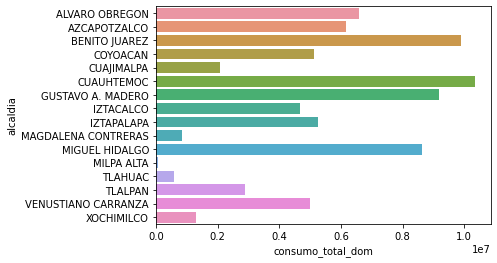

In [150]:
sns.barplot(x="consumo_total_dom", y="alcaldia", data=dom_no)

In [14]:
agua.shape[1]

17

<AxesSubplot:xlabel='consumo_total'>

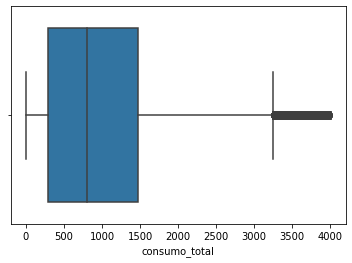

In [9]:
sns.boxplot(x="consumo_total", data=agua[agua.consumo_total<4000])

In [10]:
consumo_ind = agua.groupby(['consumo_total','indice_des'], as_index=False)

In [103]:
ind_alcaldia = agua.groupby(['alcaldia'], as_index=False)['consumo_total'].sum()\
.rename(columns={'consumo_total':'count'}).sort_values(by=['count'], ascending=False)

In [104]:
ind_alcaldia

,alcaldia,count
5,CUAUHTEMOC,1.865082e+07
10,MIGUEL HIDALGO,1.449040e+07
2,BENITO JUAREZ,1.378012e+07
6,GUSTAVO A. MADERO,1.348010e+07
0,ALVARO OBREGON,9.608503e+06
1,AZCAPOTZALCO,8.969567e+06
8,IZTAPALAPA,8.313290e+06
3,COYOACAN,7.687908e+06
14,VENUSTIANO CARRANZA,7.093249e+06
7,IZTACALCO,6.260631e+06


<AxesSubplot:xlabel='count', ylabel='alcaldia'>

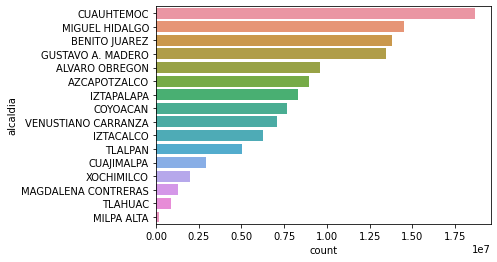

In [105]:
sns.barplot(x="count", y="alcaldia", data=ind_alcaldia)

In [106]:
ind_alcaldia2 = agua.groupby(['alcaldia','indice_des'], as_index=False)['consumo_total'].sum()\
.rename(columns={'consumo_total':'count'}).sort_values(by=['count'])

In [107]:
ind_alcaldia2

,alcaldia,indice_des,count
34,IZTAPALAPA,MEDIO,226.68
45,MILPA ALTA,MEDIO,35692.69
32,IZTAPALAPA,ALTO,44178.68
47,TLAHUAC,ALTO,44911.35
44,MILPA ALTA,BAJO,47414.48
...,...,...,...
25,GUSTAVO A. MADERO,BAJO,5839095.84
5,AZCAPOTZALCO,BAJO,6119398.30
21,CUAUHTEMOC,BAJO,6430251.23
40,MIGUEL HIDALGO,ALTO,7828405.06


<AxesSubplot:xlabel='count', ylabel='indice_des'>

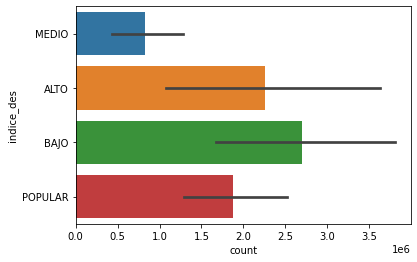

In [108]:
sns.barplot(x="count", y="indice_des", data=ind_alcaldia2)